In [1]:
import pandas as pd
import numpy as np
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(14, 8)})

Через помилку <br>
py:389: RuntimeWarning: overflow encountered in longlong_scalars
  return 2. * (tp * tn - fn * fp) / ((tp + fn) * (fn + tn) + ... <br>
Яку я не зміг вирішити, Adjusted mutual information не буде враховуватися

In [3]:
def scoring(clusterization, y_true, X):
    print(f'Number of clusters: {len(np.unique(y_true))} Estimated number of clusters: {len(np.unique(clusterization.labels_))}')
    print(f'Adjusted rand index: {metrics.adjusted_rand_score(y_true, clusterization.labels_)}')
    print(f'Adjusted mutual information: {metrics.adjusted_mutual_info_score(y_true, clusterization.labels_)}')
    print(f'Silhouette coefficient: {metrics.silhouette_score(X, clusterization.labels_)}')

Оскільки з початковим значенням n_samples=900000, кластеризація не досягла кінця завдання було змінено на n_samples=90000

In [4]:
from sklearn.datasets._samples_generator import make_circles

X, y = make_circles(90000, factor=0.1, noise=0.1)

<AxesSubplot:>

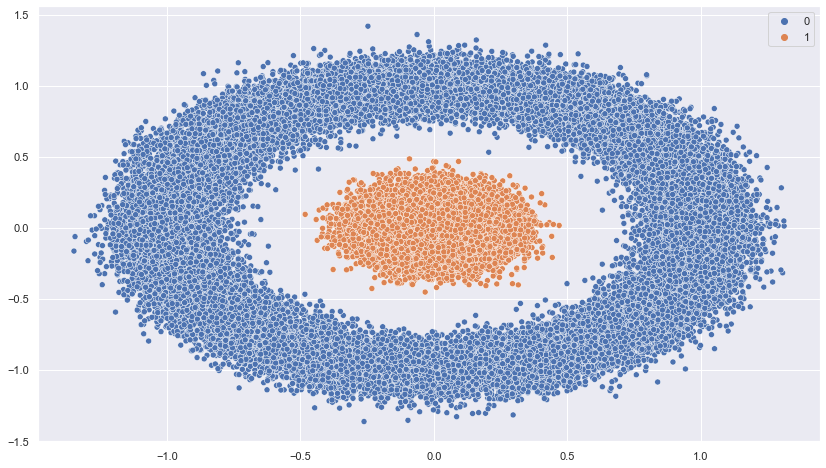

In [4]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

In [5]:
from sklearn.cluster import MeanShift

clustering = MeanShift(n_jobs=-1)

In [6]:
%%time
clustering.fit(X)

Wall time: 13min 11s


MeanShift(n_jobs=-1)

<AxesSubplot:>

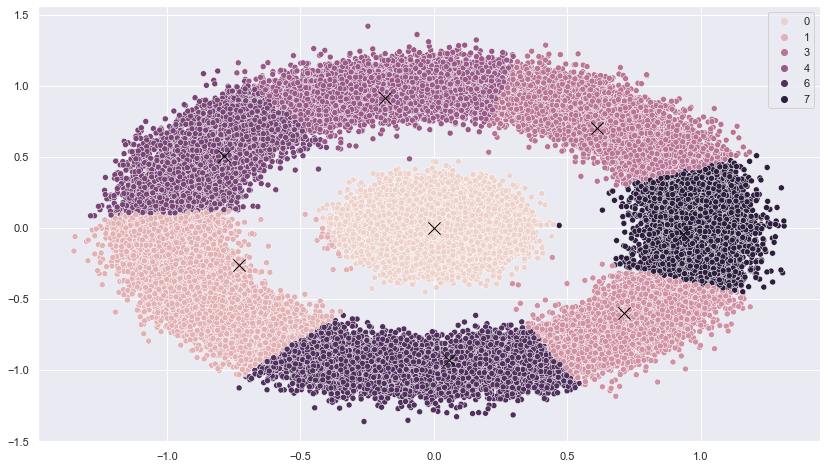

In [7]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=clustering.labels_)
sns.scatterplot(x=clustering.cluster_centers_[:, 0], y=clustering.cluster_centers_[:, 1], s=150, ec='black', marker='x')

In [8]:
scoring(clustering, y, X)

Number of clusters: 2 Estimated number of clusters: 8
Adjusted rand score: 4.432745204223001
Adjusted mutual information: 0.5868024119602753


c:\Users\Kidma\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:389: RuntimeWarning: overflow encountered in longlong_scalars
  return 2. * (tp * tn - fn * fp) / ((tp + fn) * (fn + tn) +
c:\Users\Kidma\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:390: RuntimeWarning: overflow encountered in longlong_scalars
  (tp + fp) * (fp + tn))


Silhouette coefficient: 0.5976586048255634


Значеня метрик дуже погане, кількість кластерів знайдено зовсім не правильно, спробуємо налаштувати параметр bandwidth

Дізнаємося bandwidth і завдяки цьому будемо трохи змінювати значення параметру і намагатися отримати результати краще

In [9]:
from sklearn.cluster import estimate_bandwidth

estimate_bandwidth(X, n_jobs=-1)

0.5913968599223279

bandwidth=0.5

In [10]:
clustering = MeanShift(bandwidth=0.5, n_jobs=-1)

In [11]:
%%time
clustering.fit(X)

Wall time: 9min 58s


MeanShift(bandwidth=0.5, n_jobs=-1)

<AxesSubplot:>

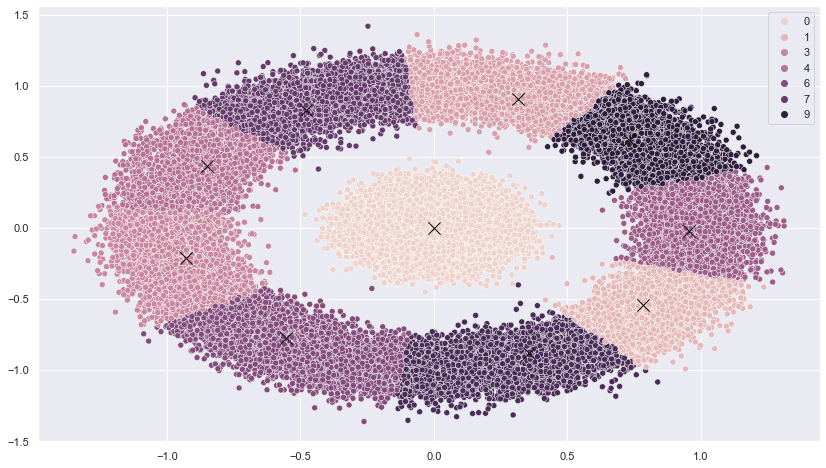

In [12]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=clustering.labels_)
sns.scatterplot(x=clustering.cluster_centers_[:, 0], y=clustering.cluster_centers_[:, 1], s=150, ec='black', marker='x')

In [13]:
scoring(clustering, y, X)

Number of clusters: 2 Estimated number of clusters: 10
Adjusted rand score: -4.462160034735501
Adjusted mutual information: 0.5583726412982809


c:\Users\Kidma\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:389: RuntimeWarning: overflow encountered in longlong_scalars
  return 2. * (tp * tn - fn * fp) / ((tp + fn) * (fn + tn) +


Silhouette coefficient: 0.5908189666654643


Така ж сама ситуація, навіть негативний rand score, що означає що згода є меншою, ніж очікується від випадкового результату, кількість кластерів стала ще більшою ніж потрібно

bandwidth=0.4

In [14]:
clustering = MeanShift(bandwidth=0.4, n_jobs=-1)

In [15]:
%%time
clustering.fit(X)

Wall time: 9min 36s


MeanShift(bandwidth=0.4, n_jobs=-1)

<AxesSubplot:>

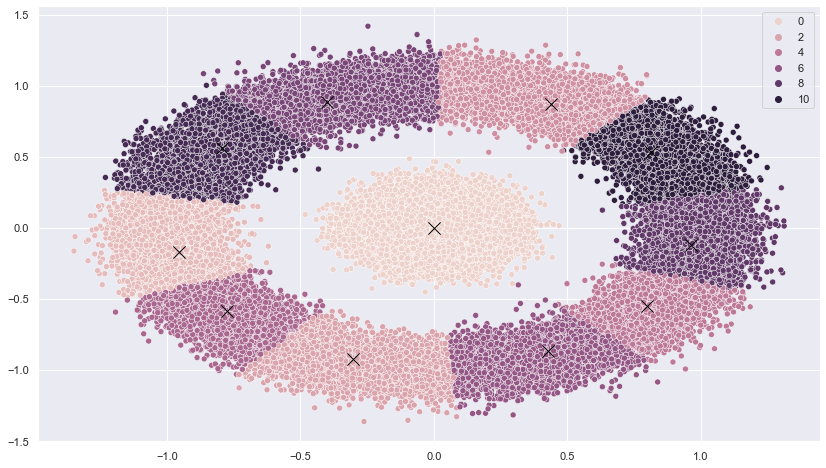

In [16]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=clustering.labels_)
sns.scatterplot(x=clustering.cluster_centers_[:, 0], y=clustering.cluster_centers_[:, 1], s=150, ec='black', marker='x')

In [17]:
scoring(clustering, y, X)

Number of clusters: 2 Estimated number of clusters: 11
Adjusted rand score: -4.416354388395946
Adjusted mutual information: 0.5468334732877479


c:\Users\Kidma\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:389: RuntimeWarning: overflow encountered in longlong_scalars
  return 2. * (tp * tn - fn * fp) / ((tp + fn) * (fn + tn) +


Silhouette coefficient: 0.5871220946710652


Така ж сама ситуація

bandwidth=0.7

In [ ]:
clustering = MeanShift(bandwidth=0.7, n_jobs=-1)

In [19]:
%%time
clustering.fit(X)

Wall time: 5min 23s


MeanShift(bandwidth=0.7, n_jobs=-1)

<AxesSubplot:>

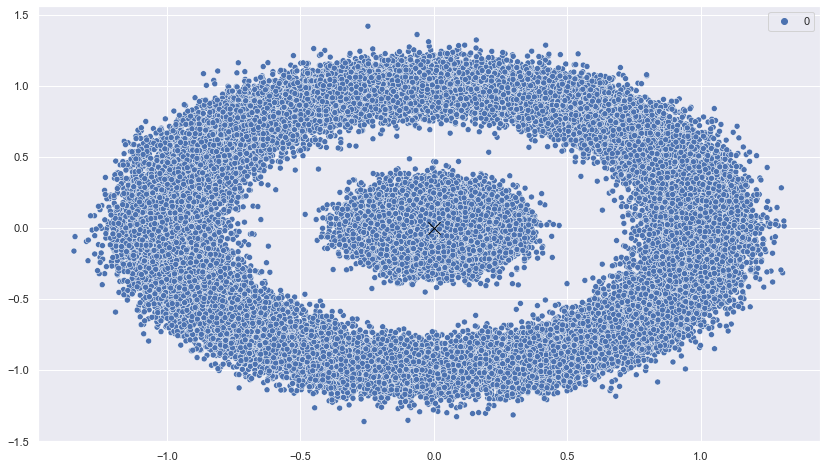

In [20]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=clustering.labels_)
sns.scatterplot(x=clustering.cluster_centers_[:, 0], y=clustering.cluster_centers_[:, 1], s=150, ec='black', marker='x')

In [21]:
# scoring(clustering, y, X)

Number of clusters: 2 Estimated number of clusters: 1
Adjusted rand score: -0.0
Adjusted mutual information: 5.125482405805499e-15


c:\Users\Kidma\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:390: RuntimeWarning: overflow encountered in longlong_scalars
  (tp + fp) * (fp + tn))


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

Scoring не працює з одним кластером, коментувати результати навіть немає сенсу

bandwidth=0.62

In [25]:
clustering = MeanShift(bandwidth=0.62, n_jobs=-1)

In [26]:
%%time
clustering.fit(X)

Wall time: 11min 6s


MeanShift(bandwidth=0.62, n_jobs=-1)

<AxesSubplot:>

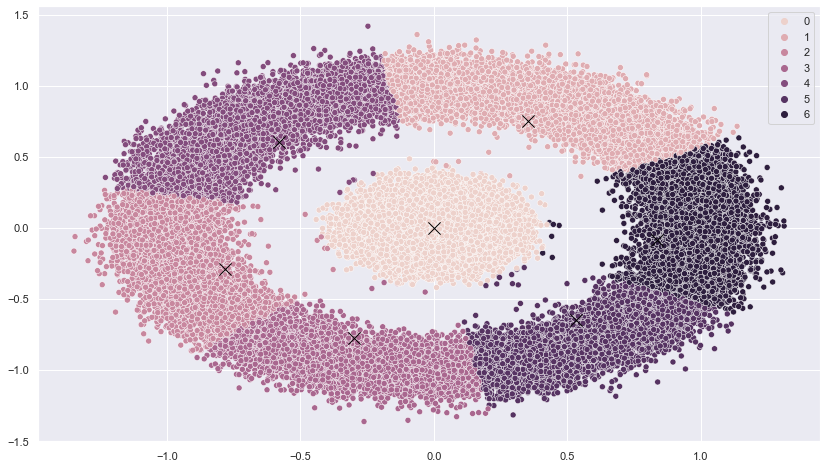

In [27]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=clustering.labels_)
sns.scatterplot(x=clustering.cluster_centers_[:, 0], y=clustering.cluster_centers_[:, 1], s=150, ec='black', marker='x')

In [28]:
scoring(clustering, y, X)

Number of clusters: 2 Estimated number of clusters: 7
Adjusted rand score: 4.342211815117061


c:\Users\Kidma\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:389: RuntimeWarning: overflow encountered in longlong_scalars
  return 2. * (tp * tn - fn * fp) / ((tp + fn) * (fn + tn) +
c:\Users\Kidma\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:390: RuntimeWarning: overflow encountered in longlong_scalars
  (tp + fp) * (fp + tn))


Adjusted mutual information: 0.6051622842970314
Silhouette coefficient: 0.6042631560536267


Також погані результати

Вилучимо деякі об'єкти з вибірки:

In [41]:
np.random.seed(10)
random_index = np.random.randint(0, 89999, 10000)
X = np.delete(X, random_index, axis=0)
y = np.delete(y, random_index, axis=0)

In [42]:
clustering = MeanShift(bandwidth=0.62, n_jobs=-1)

In [43]:
%%time
clustering.fit(X)

Wall time: 10min 10s


MeanShift(bandwidth=0.62, n_jobs=-1)

<AxesSubplot:>

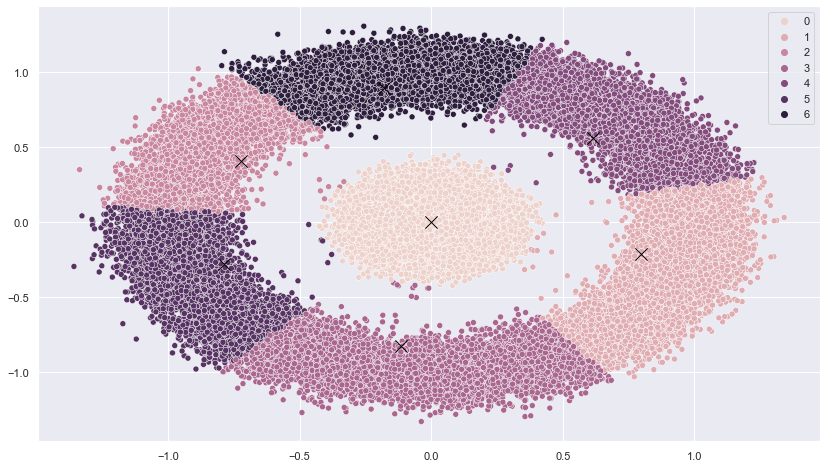

In [44]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=clustering.labels_)
sns.scatterplot(x=clustering.cluster_centers_[:, 0], y=clustering.cluster_centers_[:, 1], s=150, ec='black', marker='x')

In [45]:
scoring(clustering, y, X)

Number of clusters: 2 Estimated number of clusters: 7
Adjusted rand score: 4.738363298628316
Adjusted mutual information: 0.6054492019697668


c:\Users\Kidma\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:389: RuntimeWarning: overflow encountered in longlong_scalars
  return 2. * (tp * tn - fn * fp) / ((tp + fn) * (fn + tn) +


Silhouette coefficient: 0.6014359387615187


Результати такі ж самі погані, але алгоритм стабільно дає погані результати, а стабільність - це добре

Спробуємо алгоритм DBSCAN, на цьому наборі данних він має показати себе краще

In [12]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=0.1, min_samples=10, n_jobs=-1)

In [13]:
%%time
clustering.fit(X)

Wall time: 29.9 s


DBSCAN(eps=0.1, min_samples=10, n_jobs=-1)

<AxesSubplot:>

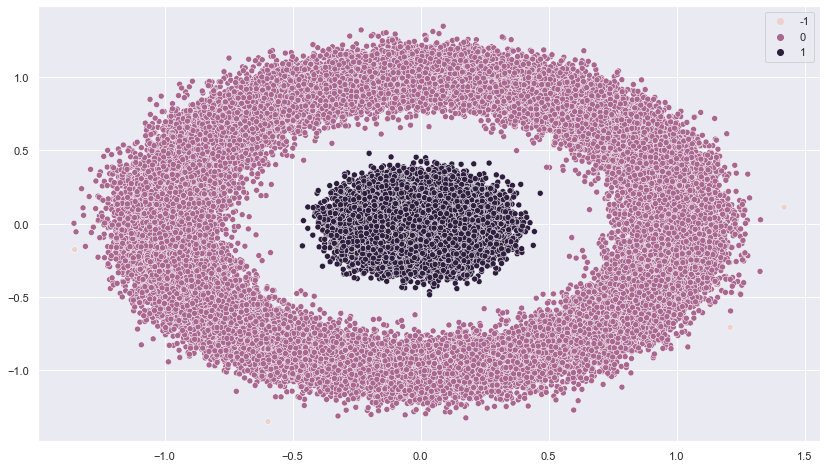

In [14]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=clustering.labels_)

In [15]:
scoring(clustering, y, X)

Number of clusters: 2 Estimated number of clusters: 3
Adjusted rand index: 1.0007130236117738
Adjusted mutual information: 0.999668986650557


c:\Users\Kidma\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:389: RuntimeWarning: overflow encountered in longlong_scalars
  return 2. * (tp * tn - fn * fp) / ((tp + fn) * (fn + tn) +
c:\Users\Kidma\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:390: RuntimeWarning: overflow encountered in longlong_scalars
  (tp + fp) * (fp + tn))


Silhouette coefficient: 0.2841234469407971


Як я і думав цей алгоритм показав себе набагато краще, значення метрик майже максимальні, ???низьке значення 'silhouette' на мою думку через вигляд датасету, шум сильно знижує значення цієї метрики??? (поясніть будь-ласка чи правильні мої судження)

Висновки:
1. MeanShift - дуже повільний алгоритм
2. На цьому датасеті він не зміг себе гарно показати, мабуть через суть алгоритму, він шукає середню кількість точок у регіоні, а з такою формою датасету він не може це зробити правильно (буде або багато кластерів, з великою кількістью на зовнішньому колі, або один кластер який має обидва кола в собі)